In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array
import random
from tensorflow.keras import layers
import matplotlib.image as mpimg
import inspect
from tqdm import tqdm
import plotly.express as px

In [4]:
#IMPORTING THE TRAIN, TEST and VALIDATION IMAGE SETS
# target=(64,64) or (75,75) or (331,331)
def image_import (target):
    train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
    train_set = train_datagen.flow_from_directory('../input/100-bird-species/train', target_size = target,batch_size = 300,
                                                 class_mode = 'categorical')
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('../input/100-bird-species/test',
                                                 target_size = target,
                                                 batch_size = 265,
                                                 class_mode = 'categorical')
    val_datagen = ImageDataGenerator(rescale = 1./255)
    val_set = val_datagen.flow_from_directory('../input/100-bird-species/valid',
                                                 target_size = target,
                                                 batch_size = 265,
                                                 class_mode = 'categorical')
    return train_set,test_set,val_set

    

In [5]:
data=pd.read_csv('../input/100-bird-species/kagle-birds.csv',index_col=0)

In [6]:
#Total Number OF Class
print("The total Classes in the dataset is {}".format(len(data.labels.value_counts())))

The total Classes in the dataset is 265


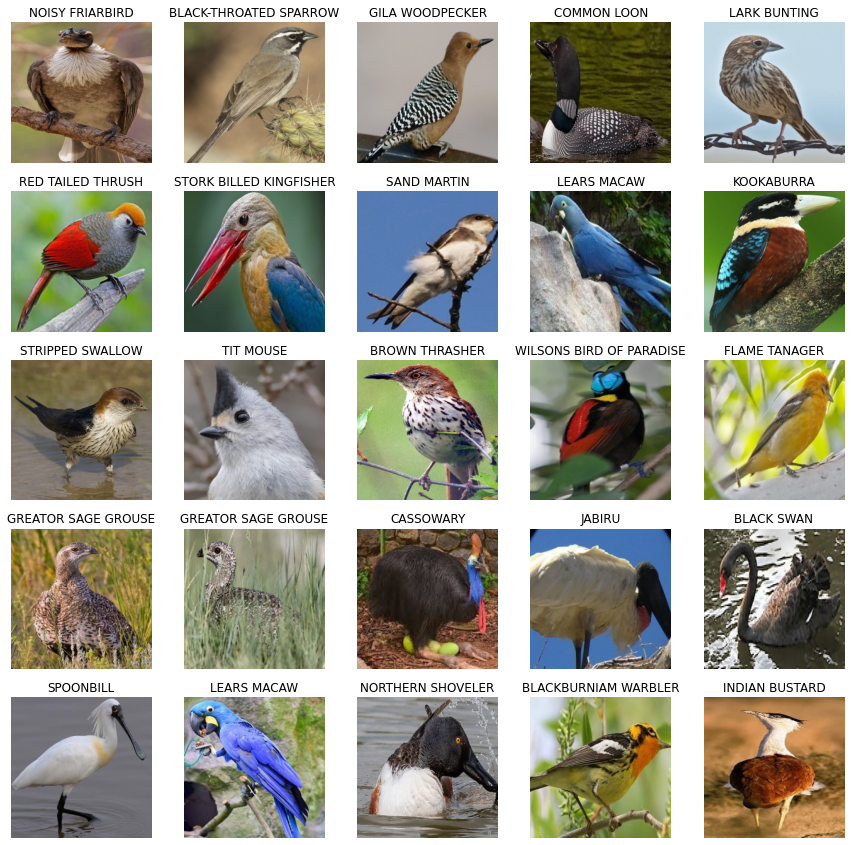

In [7]:
#Visualizing the Images In Train set
def display_random_grid(ncols=5, ds_path='../input/100-bird-species/train/'):
    fig, ax = plt.subplots(ncols=ncols, nrows=ncols, figsize=(15, 15))
    
    for i in range(ncols):
        for j in range(ncols):
            bird_species = random.choice(os.listdir(ds_path))
            random_bird_path = random.choice(os.listdir(ds_path + bird_species))
            random_bird = mpimg.imread(ds_path + bird_species + '/' + random_bird_path)
            ax[i, j].imshow(random_bird)
            ax[i, j].set_title(bird_species)
            ax[i, j].axis('off')
            
display_random_grid()

In [9]:
# #PREDICT FUNCTION
# #size(64,64,3)
# #NAME="Model_Name"
# def predict(size,NAME):
    
# #     fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15, 15))
# #     for i in range(5):
#         ds_path='../input/100-bird-species/test/'                 #XChangeX
#         random_species=random.choice(os.listdir(ds_path))
#         random_bird_path = random.choice(os.listdir(ds_path + random_species))
#         image_path = ds_path + random_species + '/' + random_bird_path                      #XChangeX
#         print(image_path)

#             #Predicting the result
#         image = load_img(image_path, target_size=size)    #XChangeX 
#         image = img_to_array(image)
        
#         image=np.expand_dims(image, axis = 0)
#         # y=model.predict(image)
#         dic=train_processed.class_indices    
#         icd={k:v for v,k in dic.items()}
#         # train_set.class_indices
#         y=clf_model.predict(image)                             #XChangeX
#         answer=np.argmax(y,axis=1)
#         print("The prediction by the model {} is {}".format(NAME ,icd[answer[0]]))     #XChangeX

#         #Visualizing the Test Image
#         plt.imshow(mpimg.imread(image_path))
#         plt.title(random_species)
#         plt.axis('off')
#         plt.show

In [26]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[244, 244, 3]))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.GlobalAveragePooling2D())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(tf.keras.layers.Dense(2048, activation='relu'))
cnn.add(tf.keras.layers.Dense(265, activation='softmax'))

In [27]:
opt=tf.keras.optimizers.Adam()
# opt=tf.keras.optimizers.RMSprop()
# opt=tf.keras.optimizers.SGD()
cnn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
#importing data
train_244,test_244,val_244=image_import((244,244))

Found 37815 images belonging to 265 classes.
Found 1325 images belonging to 265 classes.
Found 1325 images belonging to 265 classes.


In [29]:
history1=cnn.fit(x=train_244, validation_data = val_244, epochs = 60, steps_per_epoch=10)

Epoch 1/60
10/10 [==============================] - 212s 21s/step - loss: 5.5743 - accuracy: 0.0055 - val_loss: 5.5774 - val_accuracy: 0.0038
Epoch 2/60
10/10 [==============================] - 212s 21s/step - loss: 5.5141 - accuracy: 0.0094 - val_loss: 5.5560 - val_accuracy: 0.0068
Epoch 3/60
10/10 [==============================] - 212s 21s/step - loss: 5.3680 - accuracy: 0.0238 - val_loss: 5.5296 - val_accuracy: 0.0098
Epoch 4/60
10/10 [==============================] - 211s 21s/step - loss: 5.2105 - accuracy: 0.0228 - val_loss: 5.5081 - val_accuracy: 0.0098
Epoch 5/60
10/10 [==============================] - 213s 21s/step - loss: 5.0638 - accuracy: 0.0359 - val_loss: 5.5086 - val_accuracy: 0.0060
Epoch 6/60
10/10 [==============================] - 212s 21s/step - loss: 4.9788 - accuracy: 0.0366 - val_loss: 5.5018 - val_accuracy: 0.0075
Epoch 7/60
10/10 [==============================] - 211s 21s/step - loss: 4.8382 - accuracy: 0.0495 - val_loss: 5.4835 - val_accuracy: 0.0121
Epoch 

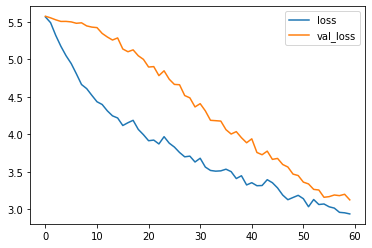

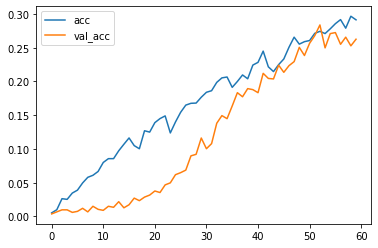

In [32]:
#Loss
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [31]:
cnn.evaluate(test_244)

5/5 [==============================] - 21s 4s/step - loss: 3.1120 - accuracy: 0.2619


[3.1120235919952393, 0.2618868052959442]

In [ ]:
# ds_path='../input/100-bird-species/test/'                 #XChangeX
# random_species=random.choice(os.listdir(ds_path))
# random_bird_path = random.choice(os.listdir(ds_path + random_species))
# image_path = ds_path + random_species + '/' + random_bird_path                      #XChangeX
# print(image_path)

#     #Predicting the result
# image = load_img(image_path, target_size=(64,64,3))    #XChangeX 
# image = img_to_array(image)
# image=np.expand_dims(image, axis = 0)
# # y=model.predict(image)
# dic=train_processed.class_indices    
# icd={k:v for v,k in dic.items()}
# # train_set.class_indices
# y=cnn.predict(image)                             #XChangeX
# answer=np.argmax(y,axis=1)
# print("The prediction by the model {} is {}".format("CNN Self" ,icd[answer[0]]))     #XChangeX

# #Visualizing the Test Image
# plt.imshow(mpimg.imread(image_path))
# plt.title(random_species)
# plt.axis('off')

In [ ]:
# predict((64, 64, 3),"self CNN")

Training Pre_trained models

In [20]:
model_dict = {m[0]:m[1] for m in inspect.getmembers(tf.keras.applications, inspect.isfunction)}
# keys=['Xception','InceptionV3','MobileNet','DenseNet169']
keys=['InceptionV3','MobileNet','DenseNet169']
model_d={key: model_dict[key] for key in keys}
print ("List of all the Pre-trained Models are : ")
for i in enumerate(model_d.keys()):
    print (i)

List of all the Pre-trained Models are : 
(0, 'InceptionV3')
(1, 'MobileNet')
(2, 'DenseNet169')


In [21]:
#Importing the data required for training
train_processed_200,test_processed_200,validation_processed_200=image_import((200,200))
train_processed_299,test_processed_299,validation_processed_299=image_import((299,299))

Found 37815 images belonging to 265 classes.
Found 1325 images belonging to 265 classes.
Found 1325 images belonging to 265 classes.
Found 37815 images belonging to 265 classes.
Found 1325 images belonging to 265 classes.
Found 1325 images belonging to 265 classes.


  0%|          | 0/3 [00:00<?, ?it/s]

87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/5
127/127 [==============================] - 1645s 13s/step - loss: 3.3367 - accuracy: 0.4266 - val_loss: 0.6860 - val_accuracy: 0.8211
Epoch 2/5
127/127 [==============================] - 1679s 13s/step - loss: 1.0034 - accuracy: 0.7499 - val_loss: 0.7091 - val_accuracy: 0.8106
Epoch 3/5
127/127 [==============================] - 1677s 13s/step - loss: 0.8809 - accuracy: 0.7858 - val_loss: 0.5901 - val_accuracy: 0.8385
Epoch 4/5
127/127 [==============================] - 1654s 13s/step - loss: 0.7145 - accuracy: 0.8207 - val_loss: 0.5353 - val_accuracy: 0.8762
Epoch 5/5
127/127 [==============================] - 1669s 13s/step - loss: 0.6305 - accuracy: 0.8386 - val_loss: 0.4802 - val_accuracy: 0.8755


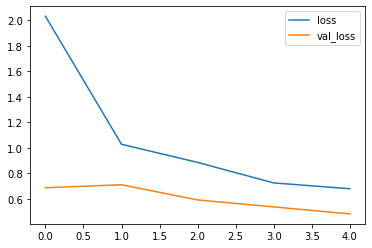

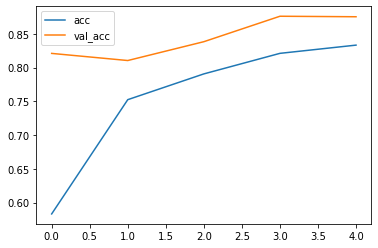

5/5 [==============================] - 52s 10s/step - loss: 0.3938 - accuracy: 0.8928


 33%|███▎      | 1/3 [2:19:51<4:39:43, 8391.81s/it]

17227776/17225924 [==============================] - 0s 0us/step
Epoch 1/5
127/127 [==============================] - 1071s 8s/step - loss: 2.9908 - accuracy: 0.4477 - val_loss: 0.3986 - val_accuracy: 0.8996
Epoch 2/5
127/127 [==============================] - 1067s 8s/step - loss: 0.5124 - accuracy: 0.8683 - val_loss: 0.2966 - val_accuracy: 0.9200
Epoch 3/5
127/127 [==============================] - 1047s 8s/step - loss: 0.3316 - accuracy: 0.9099 - val_loss: 0.2791 - val_accuracy: 0.9155
Epoch 4/5
127/127 [==============================] - 1070s 8s/step - loss: 0.2488 - accuracy: 0.9297 - val_loss: 0.2176 - val_accuracy: 0.9381
Epoch 5/5
127/127 [==============================] - 1069s 8s/step - loss: 0.2013 - accuracy: 0.9425 - val_loss: 0.1973 - val_accuracy: 0.9411


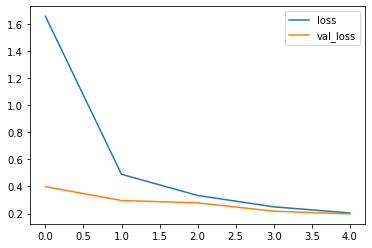

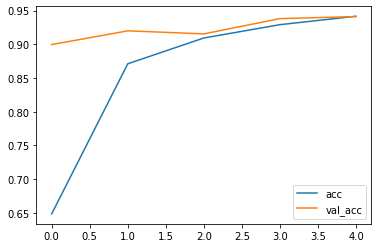

5/5 [==============================] - 30s 6s/step - loss: 0.1602 - accuracy: 0.9494


 67%|██████▋   | 2/3 [3:49:12<1:50:08, 6608.62s/it]

51879936/51877672 [==============================] - 1s 0us/step
Epoch 1/5
127/127 [==============================] - 3518s 28s/step - loss: 2.8943 - accuracy: 0.4711 - val_loss: 0.3274 - val_accuracy: 0.9238
Epoch 2/5
127/127 [==============================] - 3532s 28s/step - loss: 0.4171 - accuracy: 0.8984 - val_loss: 0.2280 - val_accuracy: 0.9389
Epoch 3/5
127/127 [==============================] - 3499s 28s/step - loss: 0.2650 - accuracy: 0.9319 - val_loss: 0.2240 - val_accuracy: 0.9404
Epoch 4/5
127/127 [==============================] - 3506s 28s/step - loss: 0.1610 - accuracy: 0.9597 - val_loss: 0.1967 - val_accuracy: 0.9426


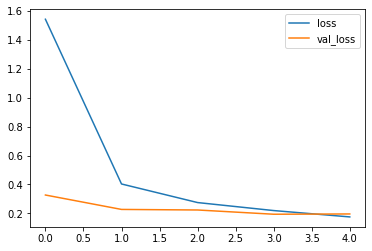

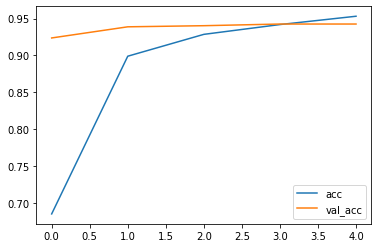

5/5 [==============================] - 113s 22s/step - loss: 0.1530 - accuracy: 0.9585


100%|██████████| 3/3 [8:44:11<00:00, 10483.82s/it] 


In [22]:
# Loop over each pre-trained models 
model_benchmarks = {'model_name': [], 'num_model_params': [], 'validation_accuracy': [],'test_set_score' : []}

for model_name, model in tqdm(model_d.items()):
    # Special handling for "Xception" since it requires input images with size more than (299,299)
    if 'Xception' in model_name:
        input_shape=(299,299,3)
        train_processed = train_processed_299
        validation_processed = validation_processed_299
        test_processed= test_processed_299 
    else:
        input_shape=(200,200,3)
        train_processed = train_processed_200
        validation_processed = validation_processed_200
        test_processed= test_processed_200
#         base_model = VGG16(input_shape = (224, 224, 3),include_top = False,weights = 'imagenet')
    # load the pre-trained model with global average pooling as the last layer and freeze the model weights
    pre_trained_model = model(include_top=False, pooling='avg', input_shape=input_shape,weights = 'imagenet')
#     for layer in pre_trained_model.layers:
#     layer.trainable = False
    pre_trained_model.trainable = False
    
    # custom modifications on top of pre-trained model and fit
    clf_model = tf.keras.models.Sequential()
    clf_model.add(pre_trained_model)
    clf_model.add(tf.keras.layers.Dense(265, activation='softmax'))
    opt=tf.keras.optimizers.Adam(learning_rate=0.004)
    clf_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
    history = clf_model.fit(train_processed, epochs=5, validation_data=validation_processed)
    
   


    
    #Loss
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.legend()
    plt.show()
    #Accuracy
    plt.plot(history.history['accuracy'],label='acc')
    plt.plot(history.history['val_accuracy'],label='val_acc')
    plt.legend()
    plt.show()
    
    # Calculate all relevant metrics
    model_benchmarks['model_name'].append(model_name)
    model_benchmarks['num_model_params'].append(pre_trained_model.count_params())
    model_benchmarks['validation_accuracy'].append(history.history['val_accuracy'][-1])
    model_benchmarks['test_set_score'].append(clf_model.evaluate(test_processed))
          

In [30]:
# Convert Results to DataFrame for easy viewing
benchmark_df = pd.DataFrame(model_benchmarks)


benchmark_df.head()

,model_name,num_model_params,validation_accuracy,test_set_score
0,InceptionV3,21802784,0.875472,"[0.39381906390190125, 0.8928301930427551]"
1,MobileNet,3228864,0.941132,"[0.16018028557300568, 0.9494339823722839]"
2,DenseNet169,12642880,0.942641,"[0.15297871828079224, 0.9584905505180359]"
